In [347]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [348]:
mydata = np.loadtxt("01-18train.csv",delimiter=",")
data = np.loadtxt("01-18test.csv",delimiter=",")

In [349]:
mydata0 = mydata[mydata[:,1]==0]
mydata1 = mydata[mydata[:,1]==1]
data0 = mydata[mydata[:,1]==0]
data1 = mydata[mydata[:,1]==1]

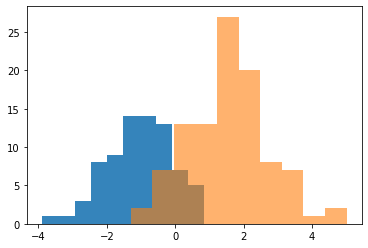

In [350]:
plt.hist(mydata0[:,0], alpha=0.9)
plt.hist(mydata1[:,0], alpha=0.6)

plt.show()

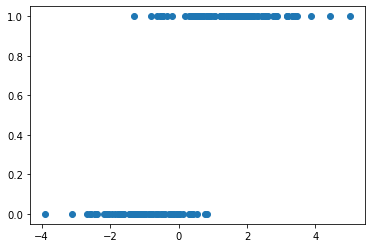

In [351]:
plt.scatter(mydata[:,0],mydata[:,1])

In [352]:
class myBayes():
    import scipy.stats as stats
    
    def __init__(self):
        import scipy.stats as stats

    def fit(self, X, y):
        self.classes = np.unique(np.array(y)) # list of classes
        if (self.classes.min() != 0) | (self.classes.max() != self.classes.shape[0] - 1):
            return print("Classes must be np.array[0,...n]")
        self.py = np.bincount(y.astype('int8'))/y.size  # compute the priors P(y_k) for each class
        self.dists = []
        for i in np.unique(np.array(y)):
            thisx = X[y == i]
            thismean = np.mean(thisx, axis=0)
            thiscov = np.cov(thisx.T)
            self.dists.append(stats.multivariate_normal(thismean, thiscov))
        return self

    def predict(self,X):
        myprobs = []
        for i in range(self.classes.shape[0]):
            myprobs.append(self.py[i] * np.array(self.dists[i].pdf(np.array(X))))
        return  np.argmax(np.array(myprobs).T, axis=1)
    

In [353]:
myownbayes = myBayes()

In [381]:
mydists = myownbayes.fit(mydata[:,0],mydata[:,1]) #doing the fit on the train data

In [380]:
mydists.predict(mydata[:,0]) #Predicting on train data

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [356]:
mydists = myownbayes.fit(data[:,0],data[:,1])

In [357]:
testpredict = mydists.predict(data[:,0])

In [379]:
testpredict #Predicting on Test data

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1])

In [359]:
incorrect = (testpredict - data[:,1])

In [360]:
100 - (np.count_nonzero(incorrect)*100)/incorrect.shape[0]

92.85714285714286

In [361]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    def findweights(self):
        return (self.w_,self.b_)
        

In [362]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
fit = lrgd.fit(data[:,:1],
         data[:,1:2].T[0])

In [363]:
fit.findweights()

(array([3.09407741]), -0.5944725337482788)

In [364]:
predictvalues1 = fit.predict(data[:,:1])

In [365]:
incorrect1 = predictvalues1 - data[:,1:2].T[0]

In [366]:
(np.count_nonzero(incorrect1)*100)/incorrect1.shape[0] 

7.142857142857143

In [367]:
np.count_nonzero(incorrect1)

5

In [368]:
import numpy as np

In [369]:
arr = np.linspace(-3.8,4.8,50)
w,b = fit.findweights()
print(w)
z = (w * arr) + b
p = 1/(1 + np.exp(-z))

[3.09407741]


In [370]:
p

array([4.32122759e-06, 7.43782576e-06, 1.28021786e-05, 2.20353568e-05,
       3.79274284e-05, 6.52802381e-05, 1.12357352e-04, 1.93377756e-04,
       3.32802180e-04, 5.72693356e-04, 9.85332960e-04, 1.69478534e-03,
       2.91356278e-03, 5.00441066e-03, 8.58278931e-03, 1.46821135e-02,
       2.50065692e-02, 4.22796471e-02, 7.06197670e-02, 1.15662153e-01,
       1.83753150e-01, 2.79270835e-01, 4.00102217e-01, 5.34446083e-01,
       6.63971912e-01, 7.72782030e-01, 8.54100322e-01, 9.09715948e-01,
       9.45484567e-01, 9.67587317e-01, 9.80909662e-01, 9.88819495e-01,
       9.93473797e-01, 9.96198022e-01, 9.97787609e-01, 9.98713457e-01,
       9.99252143e-01, 9.99565375e-01, 9.99747447e-01, 9.99853256e-01,
       9.99914740e-01, 9.99950464e-01, 9.99971220e-01, 9.99983279e-01,
       9.99990286e-01, 9.99994356e-01, 9.99996721e-01, 9.99998095e-01,
       9.99998893e-01, 9.99999357e-01])

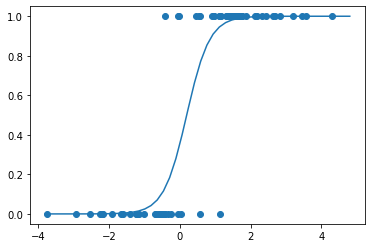

In [371]:
plt.scatter(data[:,:1],data[:,1:2])
plt.plot(arr,p)

# Question 3

In [372]:
from numpy import linalg as LA

In [373]:
knn = np.loadtxt("01-19data.csv",delimiter=",")

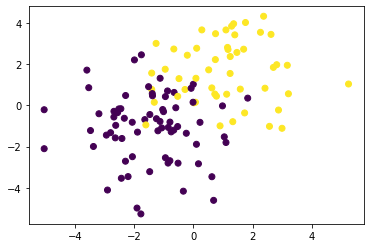

In [374]:
plt.scatter(knn[:,0], knn[:,1], c = knn[:,2])

In [375]:
mypt = np.array([0,1])

In [376]:
x = knn[:,:2]
y = knn[:,2]

In [377]:
def myKNN(X, y, pt, k):
    plt.scatter(knn[:,0], knn[:,1], c = knn[:,2])
    plt.plot(0,1,marker="o", markersize=3, color="red")
    plt.show()
    
    temp = np.argpartition(LA.norm(mypt - x, axis=1),k)
    ar2 = knn[temp[:k],2]
    max1 = max(set(ar2.tolist()), key = ar2.tolist().count)
    print("The classifier with highest frequency is:")
    return max1

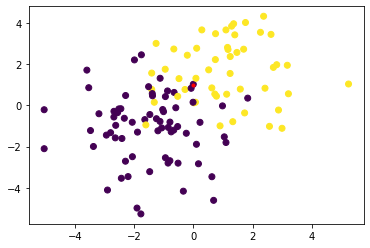

The classifier with highest frequency is:


1.0

In [378]:
myKNN(x,y,mypt,5)